In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import shap

shap.initjs()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(*shap.datasets.iris(), test_size=.2, random_state=12345)

In [9]:
svm = SVC(kernel='rbf', probability=True)

In [11]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [13]:
explaner = shap.KernelExplainer(svm.predict, X_train)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [15]:
shap_values = explaner.shap_values(X_test)

  0%|          | 0/30 [00:00<?, ?it/s]

In [17]:
shap.force_plot(explaner.expected_value, shap_values, X_test)

In [19]:
shap.force_plot(explaner.expected_value, shap_values[0], X_test.iloc[0], link='logit')

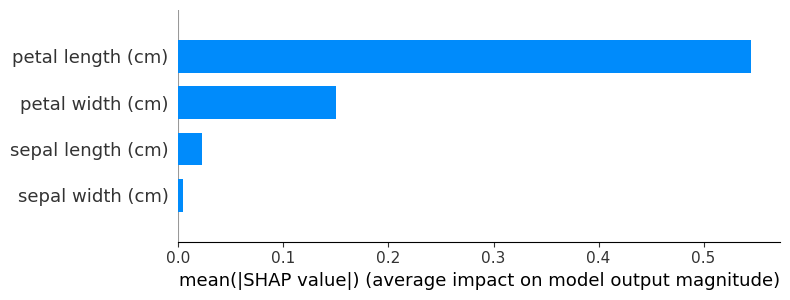

In [25]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

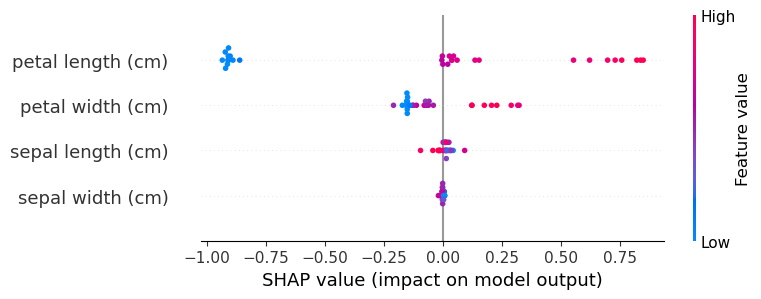

In [10]:
shap.summary_plot(shap_values, X_test)